# <b>Kaggle Learn</b>
# 12. Time Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision = 4, suppress = True)
from pandas import Series, DataFrame
%matplotlib inline

## 1. Linear Regression With Time Series

In [2]:
df = pd.read_csv('input/book_sales.csv', 
                 index_col = 'Date', 
                 parse_dates = ['Date']).drop('Paperback', axis = 1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [3]:
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


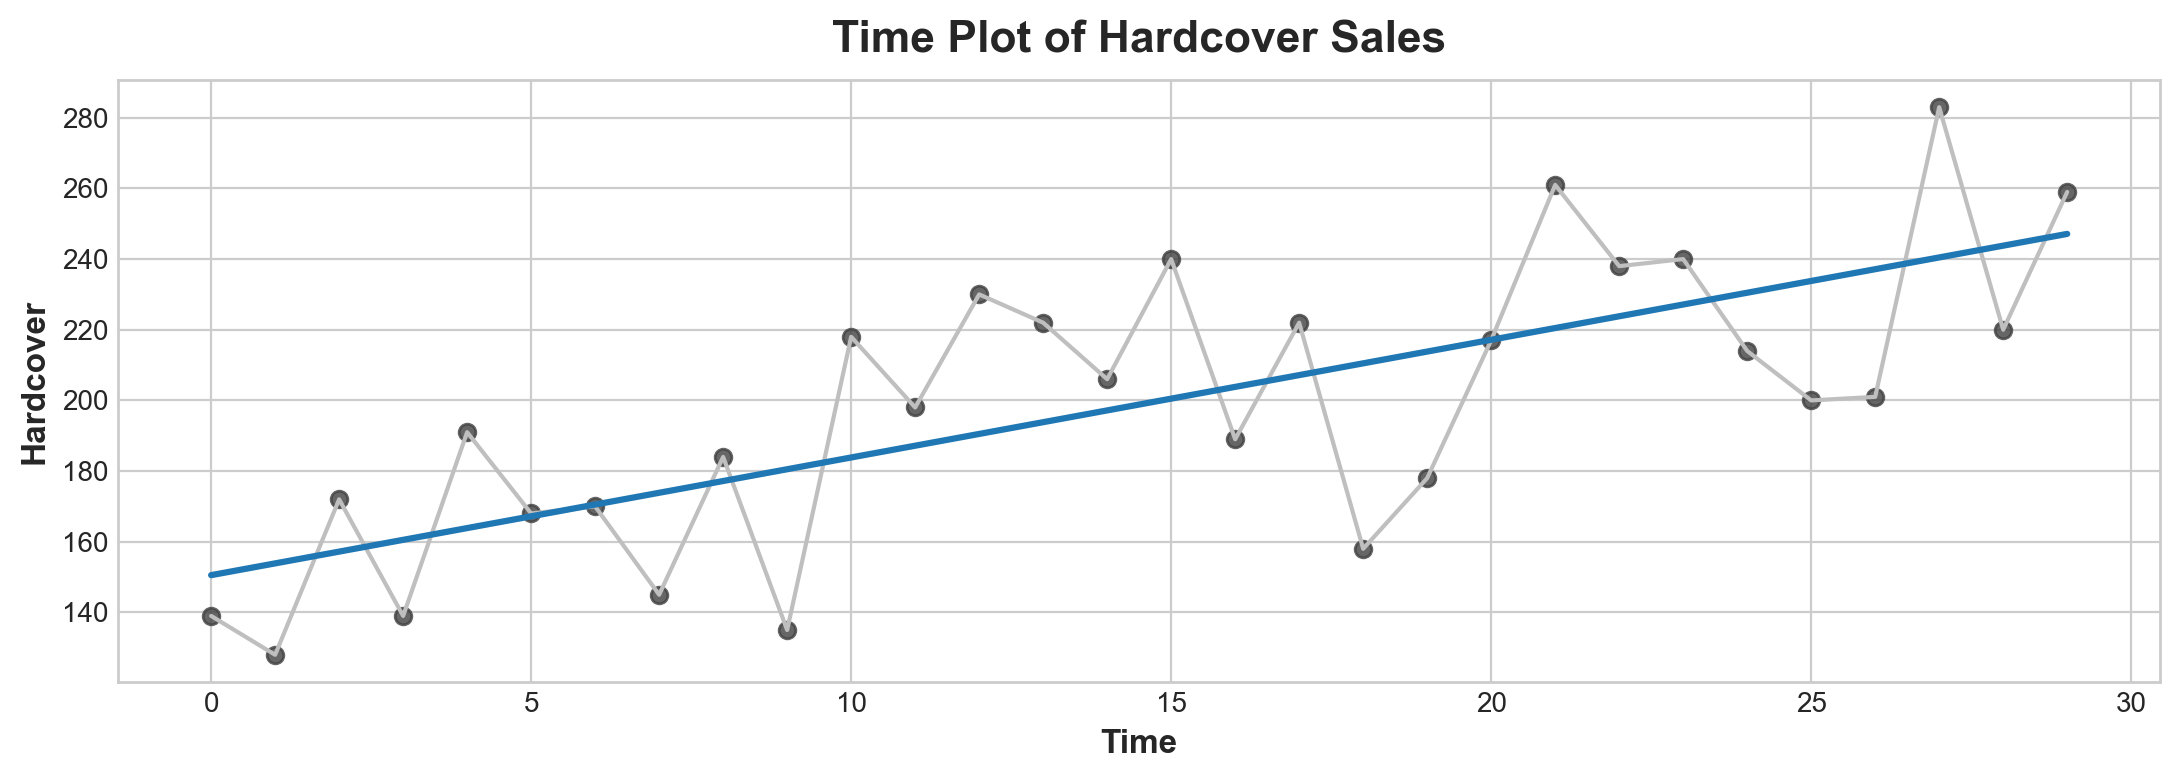

In [4]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure',
       autolayout = True,
       figsize = (11, 4),
       titlesize = 18,
       titleweight = 'bold')
plt.rc('axes',
       labelweight = 'bold',
       labelsize = 'large',
       titleweight = 'bold',
       titlesize = 16,
       titlepad = 10)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data = df, color = '0.75')
ax = sns.regplot(x = 'Time', y = 'Hardcover', data = df, ci = None, scatter_kws = dict(color = '0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [9]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


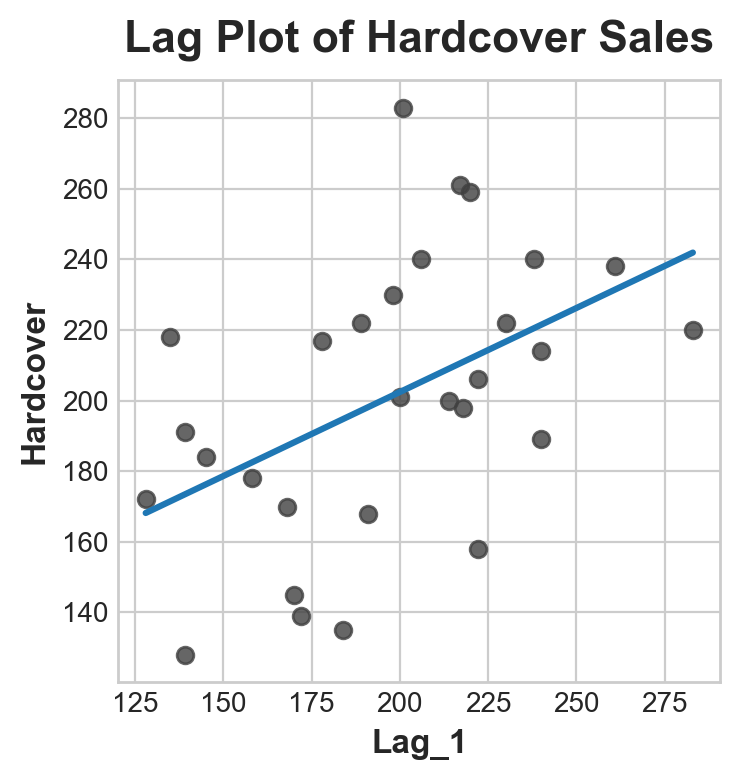

In [10]:
fig, ax = plt.subplots()
ax = sns.regplot(x = 'Lag_1', y = 'Hardcover', data = df, ci = None, scatter_kws = dict(color = '0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

In [12]:
df.corr()

,Hardcover,Lag_1
Hardcover,1.000000,0.475708
Lag_1,0.475708,1.000000


In [33]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore')   # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (11, 4))
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10,
)
plot_params = dict(
    color = '0.75',
    style = '.-',
    markeredgecolor = '0.25',
    markerfacecolor = '0.25',
    legend = False,
)
%config InlineBackend.figure_format = 'retina'

# Load Tunnel Traffic dataset
data_dir = Path('input/tunnel.csv')
tunnel = pd.read_csv(data_dir, parse_dates = ['Day'])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index('Day')

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [34]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [35]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index = X.index)

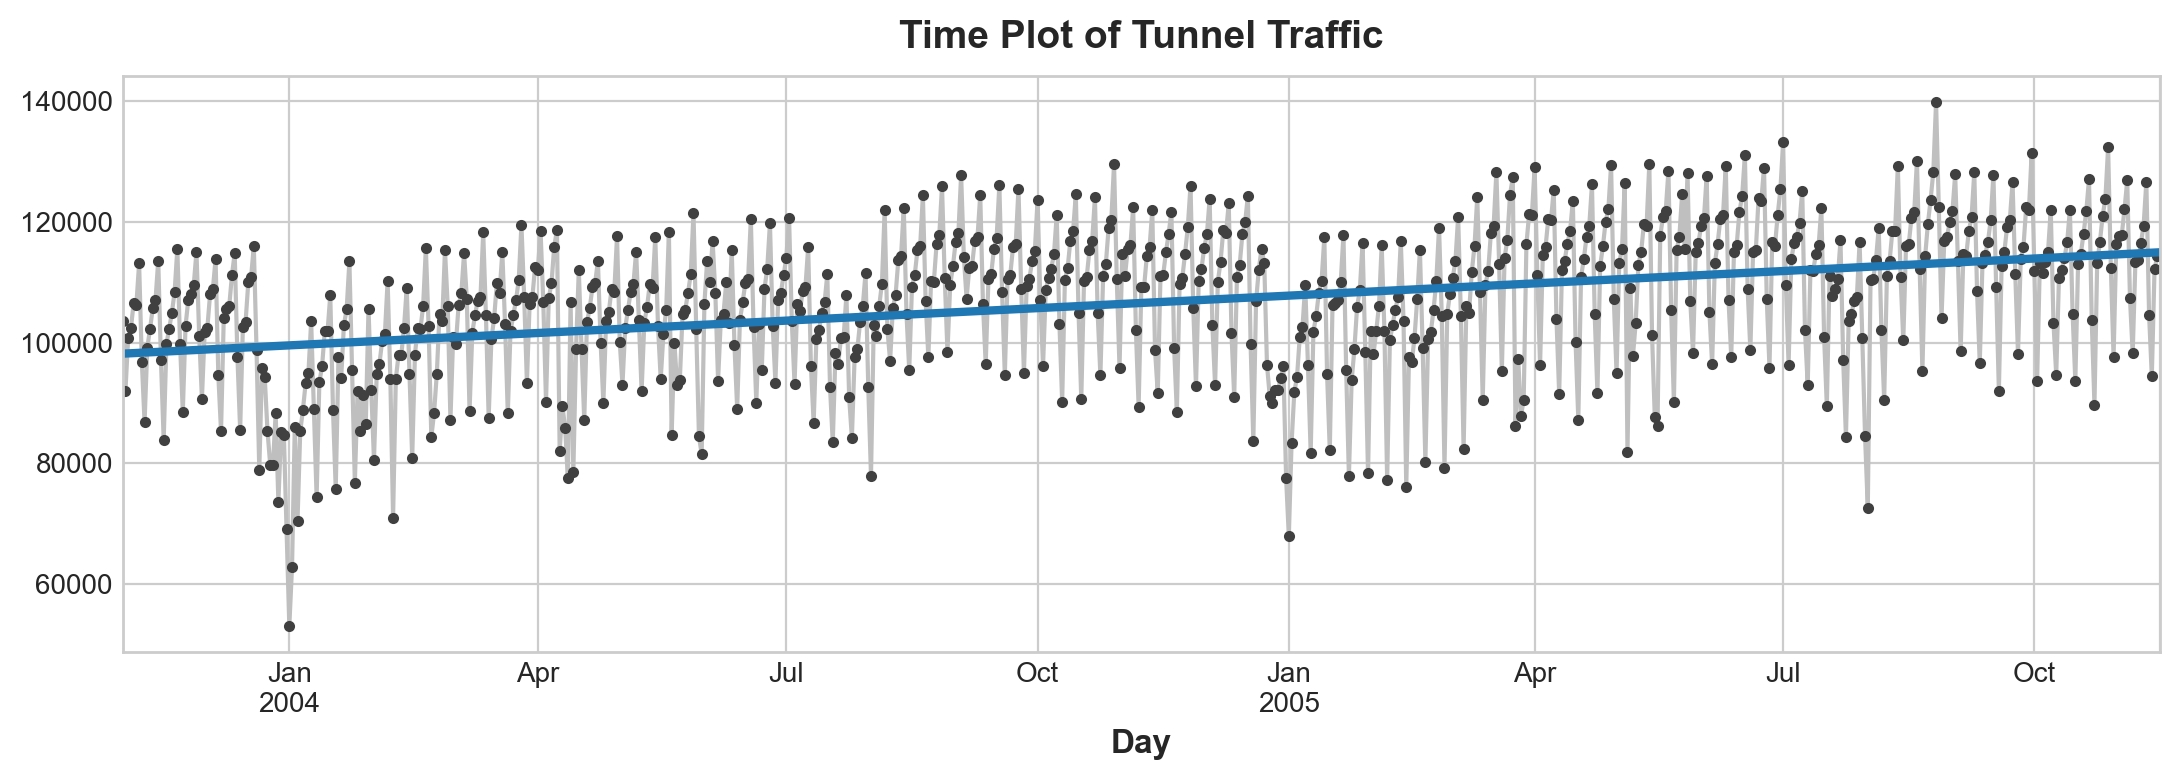

In [36]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax = ax, linewidth = 3)
ax.set_title('Time Plot of Tunnel Traffic');

In [37]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [38]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace = True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join = 'inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

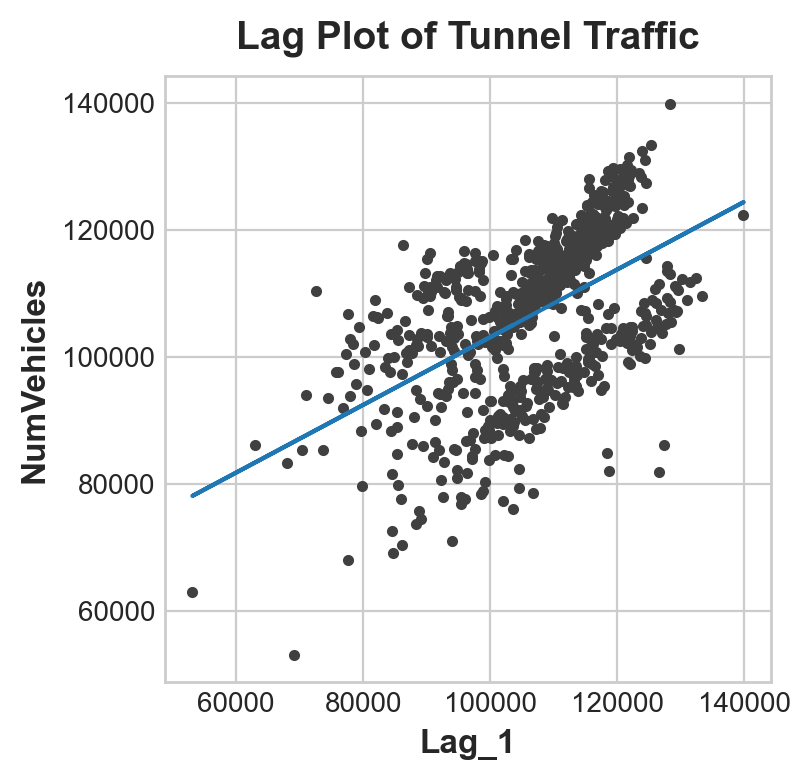

In [40]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color = '0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

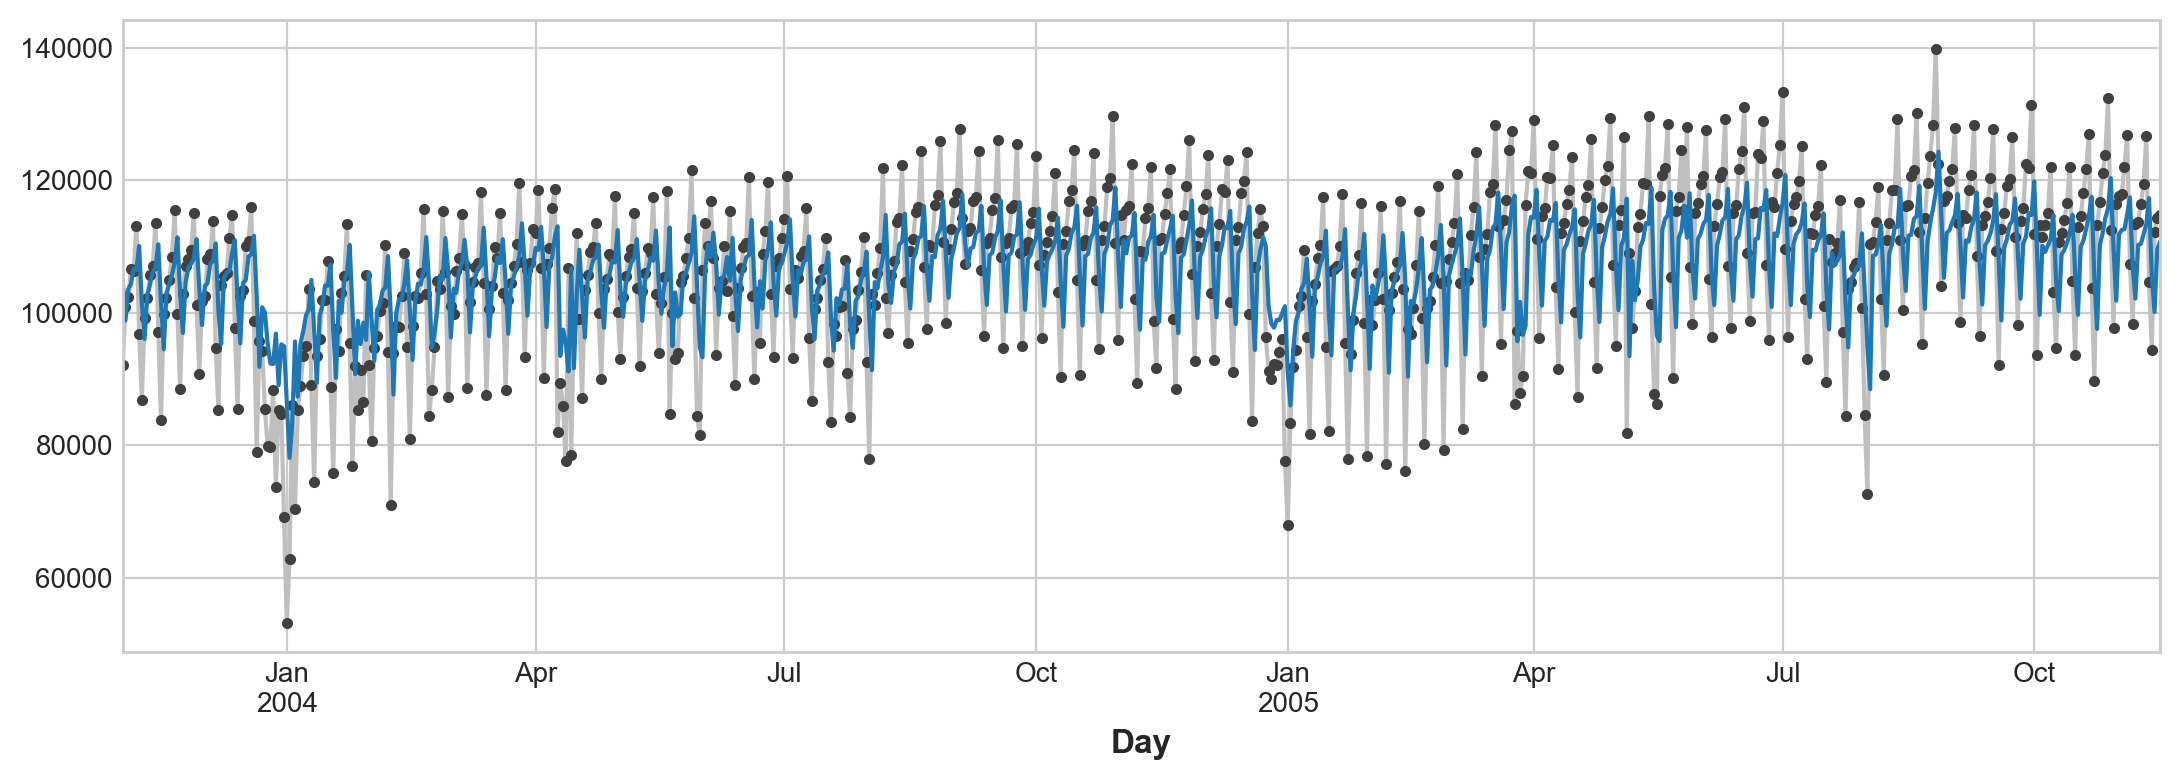

In [41]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

## 2. Trend

In [3]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore')   # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True, figsize = (11, 5))
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
)
plot_params = dict(
    color = "0.75",
    style = ".-",
    markeredgecolor = "0.25",
    markerfacecolor = "0.25",
    legend = False,
)
%config InlineBackend.figure_format = 'retina'

# Load Tunnel Traffic dataset
data_dir = Path('input/tunnel.csv')
tunnel = pd.read_csv(data_dir, parse_dates = ['Day'])
tunnel = tunnel.set_index('Day').to_period()

In [4]:
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


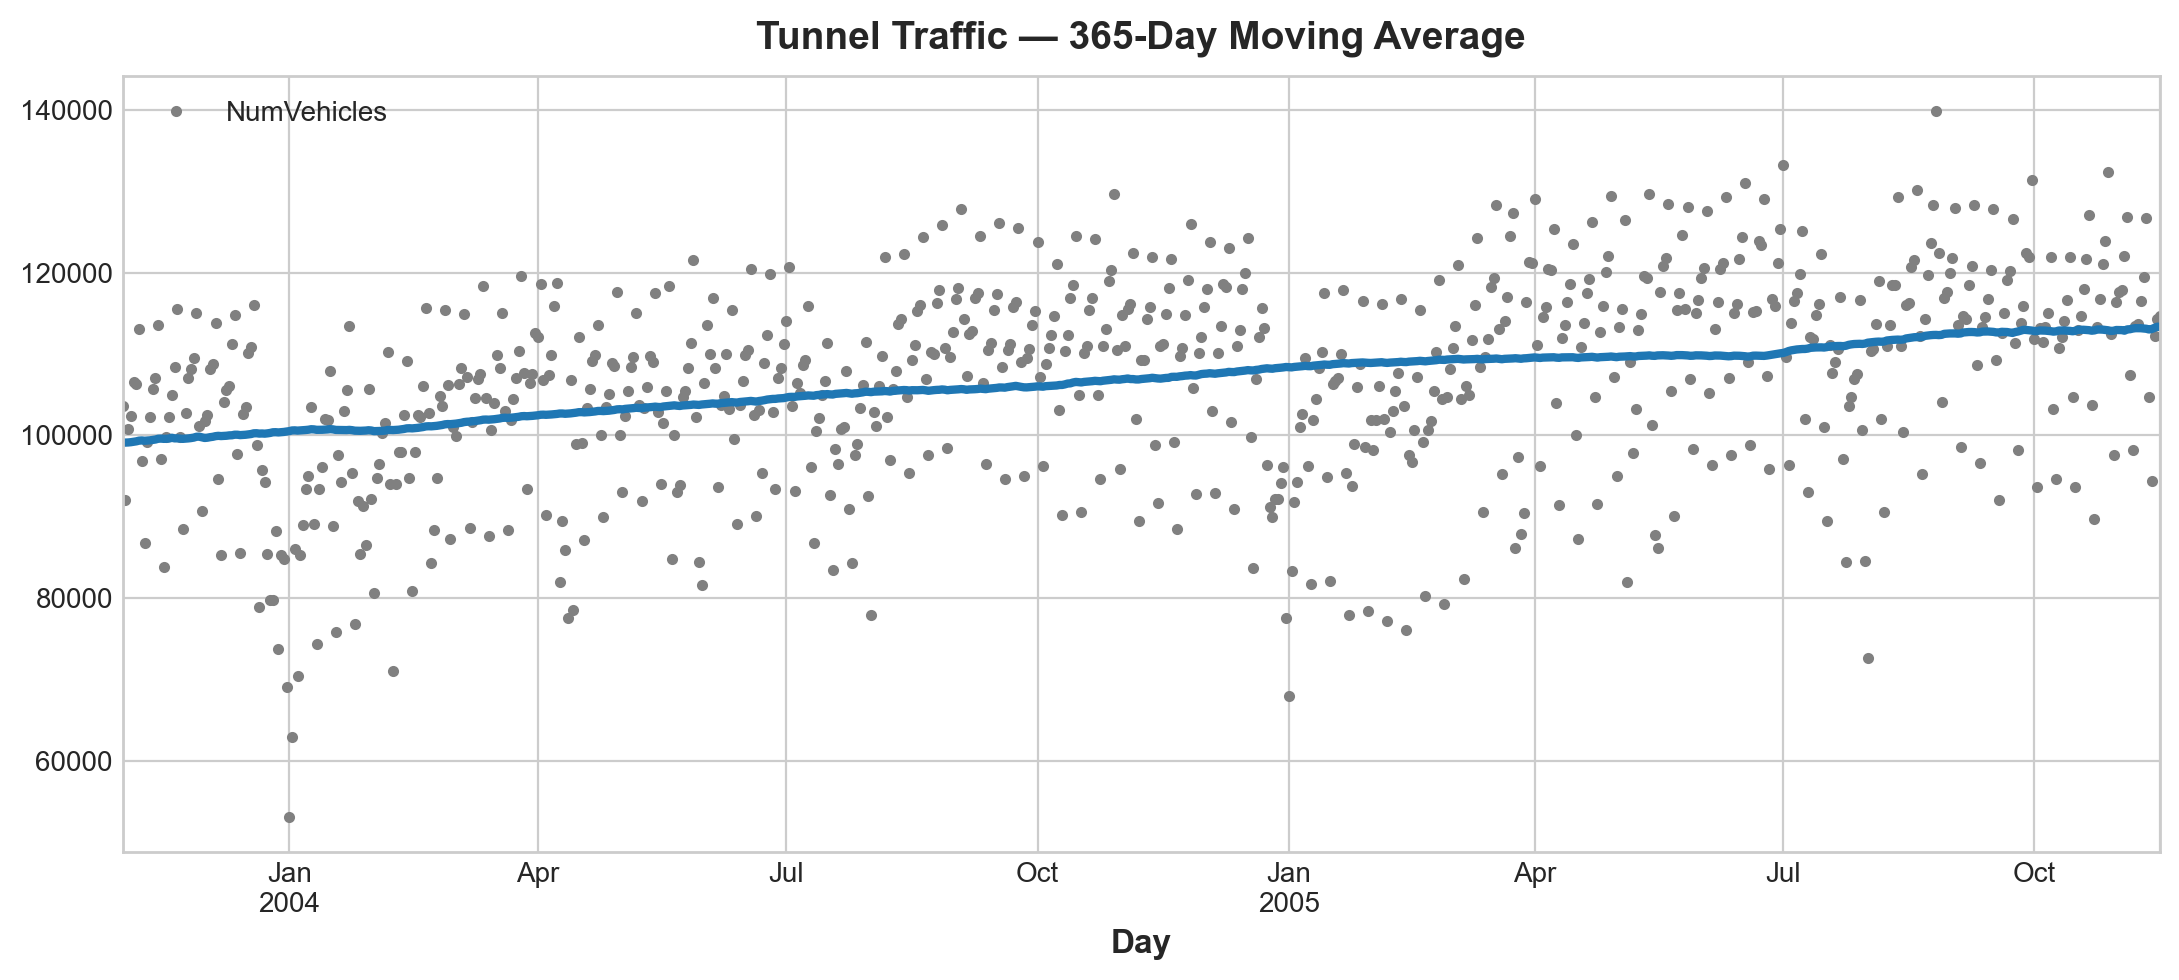

In [14]:
moving_average = tunnel.rolling(
    window = 365,        # 365-day window
    center = True,       # put the average at the center of the window
    min_periods = 183,   # choose about half the window size
).mean()                 # compute the mean (could also do median, std, min, max, ...)

ax = tunnel.plot(style = '.', color = '0.5')
moving_average.plot(ax = ax, linewidth = 3, title = 'Tunnel Traffic — 365-Day Moving Average', legend = False);

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = tunnel.index,  # dates from the training data
    constant = True,       # dummy features for the bias (y_intercept)
    order = 1,             # the time dummy (trend)
    drop = True,           # drop terms if necessary to avoid collinearity
)

# 'in_sample' creates features for the dates given in the 'index' argument
X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [16]:
from sklearn.linear_model import LinearRegression

y = tunnel['NumVehicles']   # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept = False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

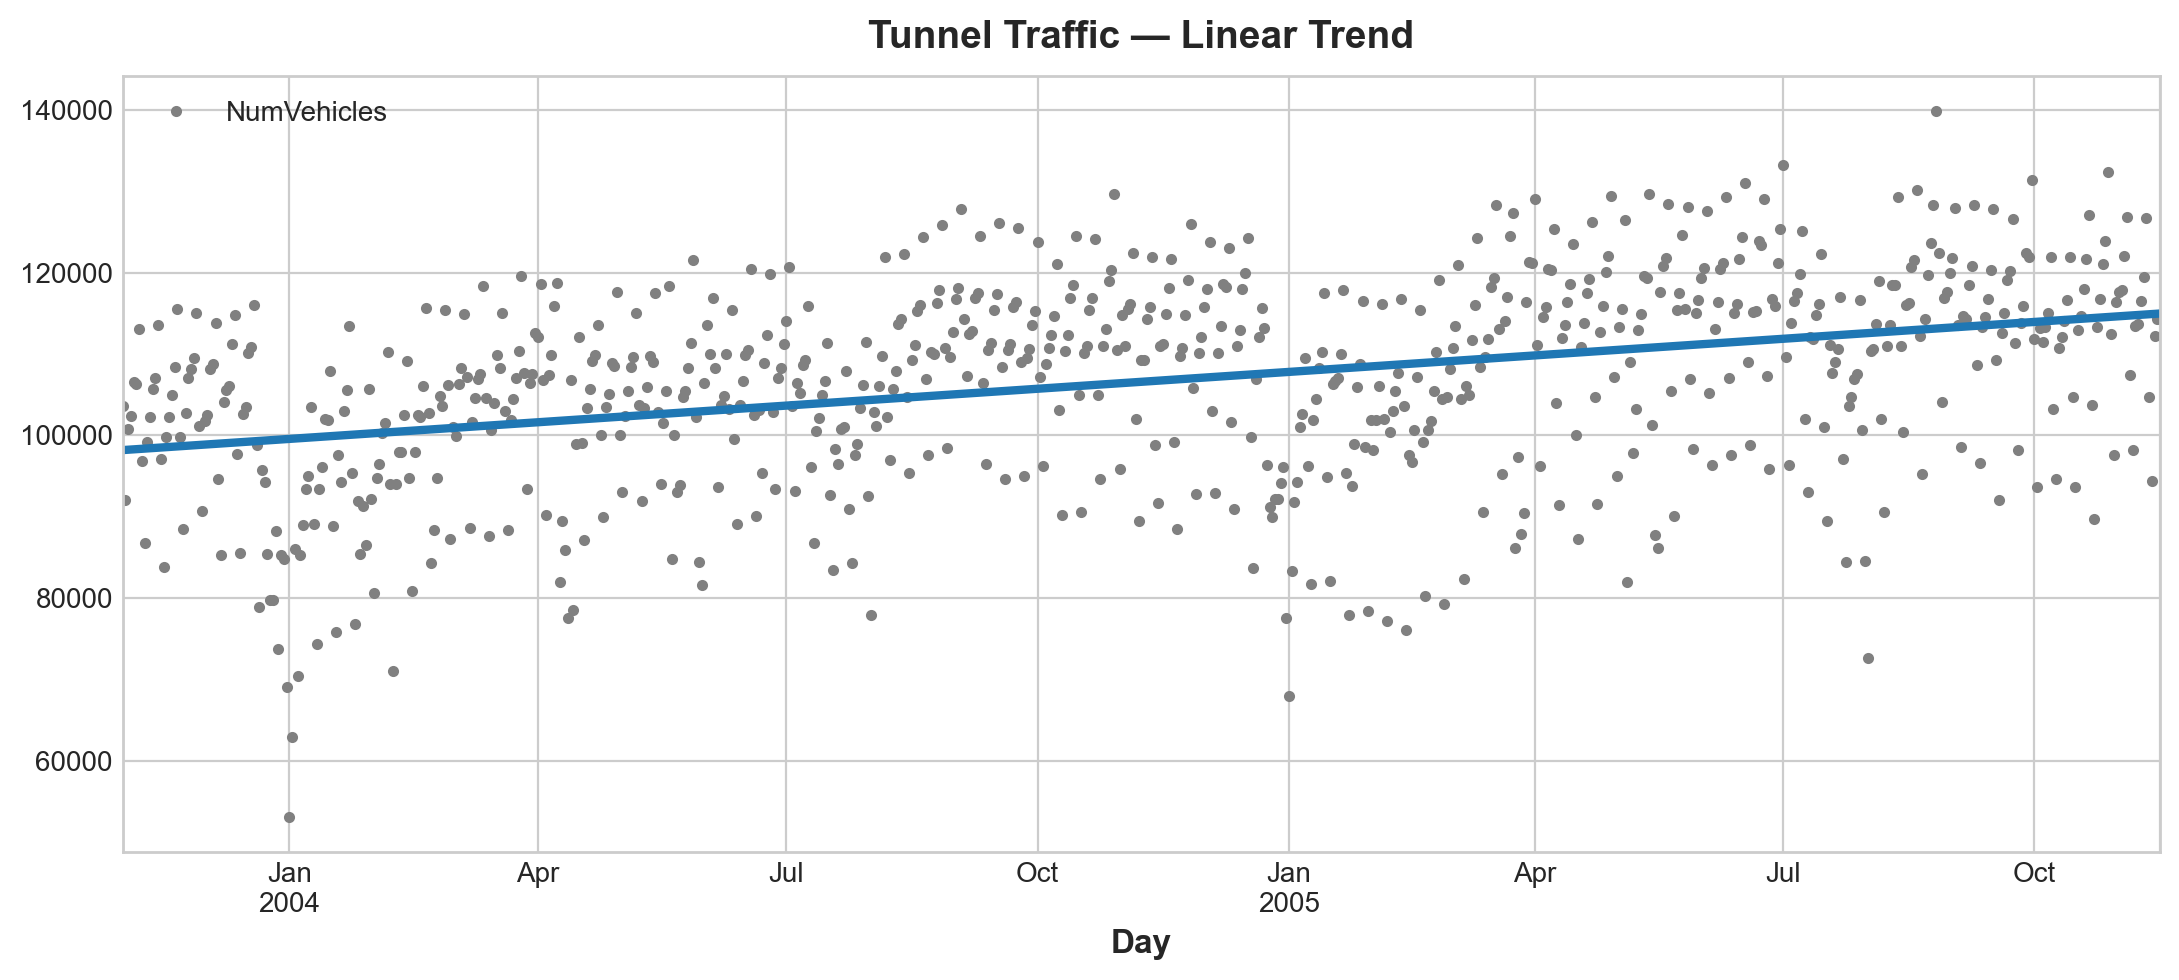

In [17]:
ax = tunnel.plot(style = '.', color = '0.5', title = 'Tunnel Traffic — Linear Trend')
_ = y_pred.plot(ax = ax, linewidth = 3, label = 'Trend')

In [18]:
X = dp.out_of_sample(steps = 30)

y_fore = pd.Series(model.predict(X), index = X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

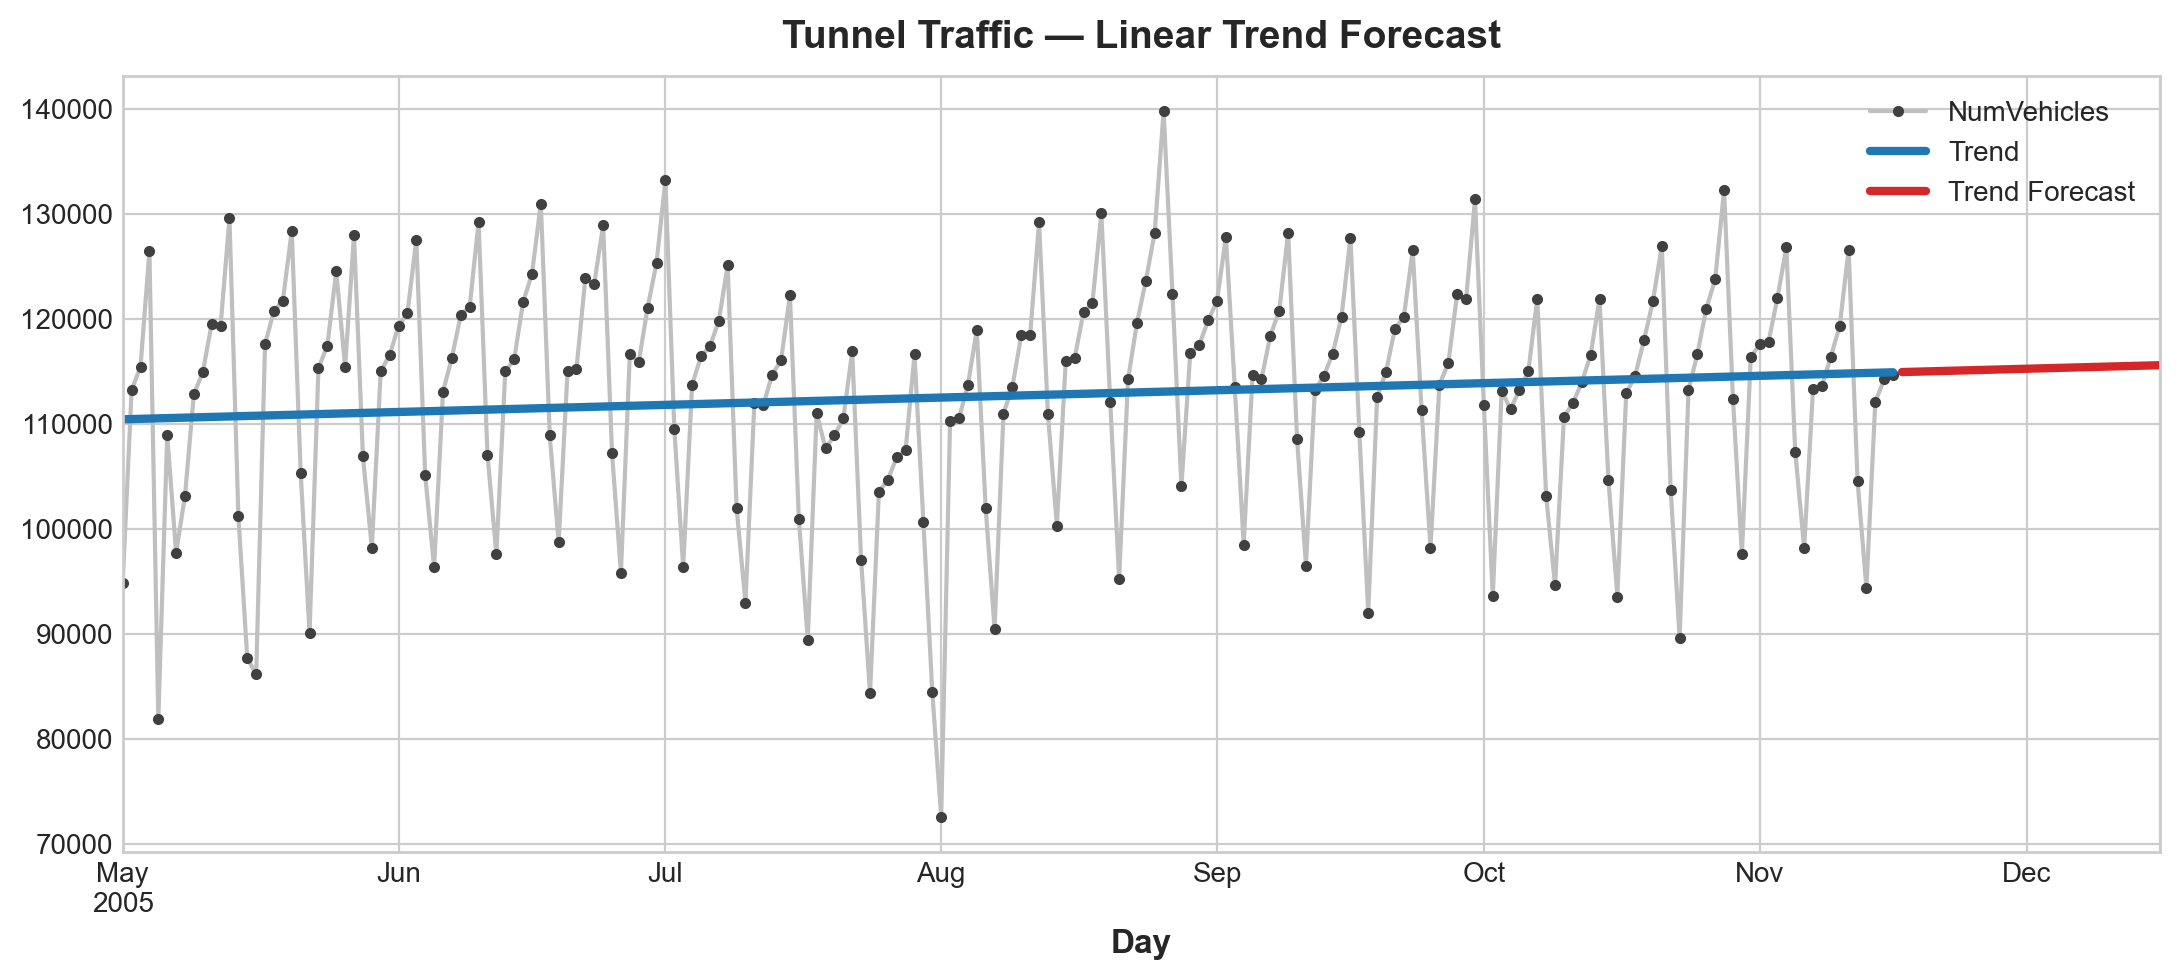

In [19]:
ax = tunnel['2005-05':].plot(title = 'Tunnel Traffic — Linear Trend Forecast', **plot_params)
ax = y_pred['2005-05':].plot(ax = ax, linewidth = 3, label = 'Trend')
ax = y_fore.plot(ax = ax, linewidth = 3, label = 'Trend Forecast', color = 'C3')
_ = ax.legend()

## 3. Seasonality

In [20]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype = np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f'sin_{freq}_{i}': np.sin(i * k),
            f'cos_{freq}_{i}': np.cos(i * k),
        })
    return pd.DataFrame(features, index = index)

In [22]:
# Compute Fourier features to the 4th order (8 new features) for a
# series y with daily observations and annual seasonality:
fourier_features(y, freq = 365.25, order = 4)

,sin_365.25_1,cos_365.25_1,sin_365.25_2,cos_365.25_2,sin_365.25_3,cos_365.25_3,sin_365.25_4,cos_365.25_4
NumVehicles,,,,,,,,
103536,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
92051,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0.068755,0.997634
100795,0.034398,0.999408,0.068755,0.997634,0.103031,0.994678,0.137185,0.990545
102352,0.051584,0.998669,0.103031,0.994678,0.154204,0.988039,0.204966,0.978769
106569,0.068755,0.997634,0.137185,0.990545,0.204966,0.978769,0.271777,0.962360
...,...,...,...,...,...,...,...,...
104646,0.196540,0.980496,0.385413,0.922744,0.559252,0.828998,0.711275,0.702914
94424,0.213377,0.976970,0.416925,0.908941,0.601269,0.799047,0.757921,0.652346
112165,0.230151,0.973155,0.447944,0.894061,0.641688,0.766966,0.800980,0.598692


In [23]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

data_dir = Path("input/tunnel.csv")
tunnel = pd.read_csv(data_dir, parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

In [26]:
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


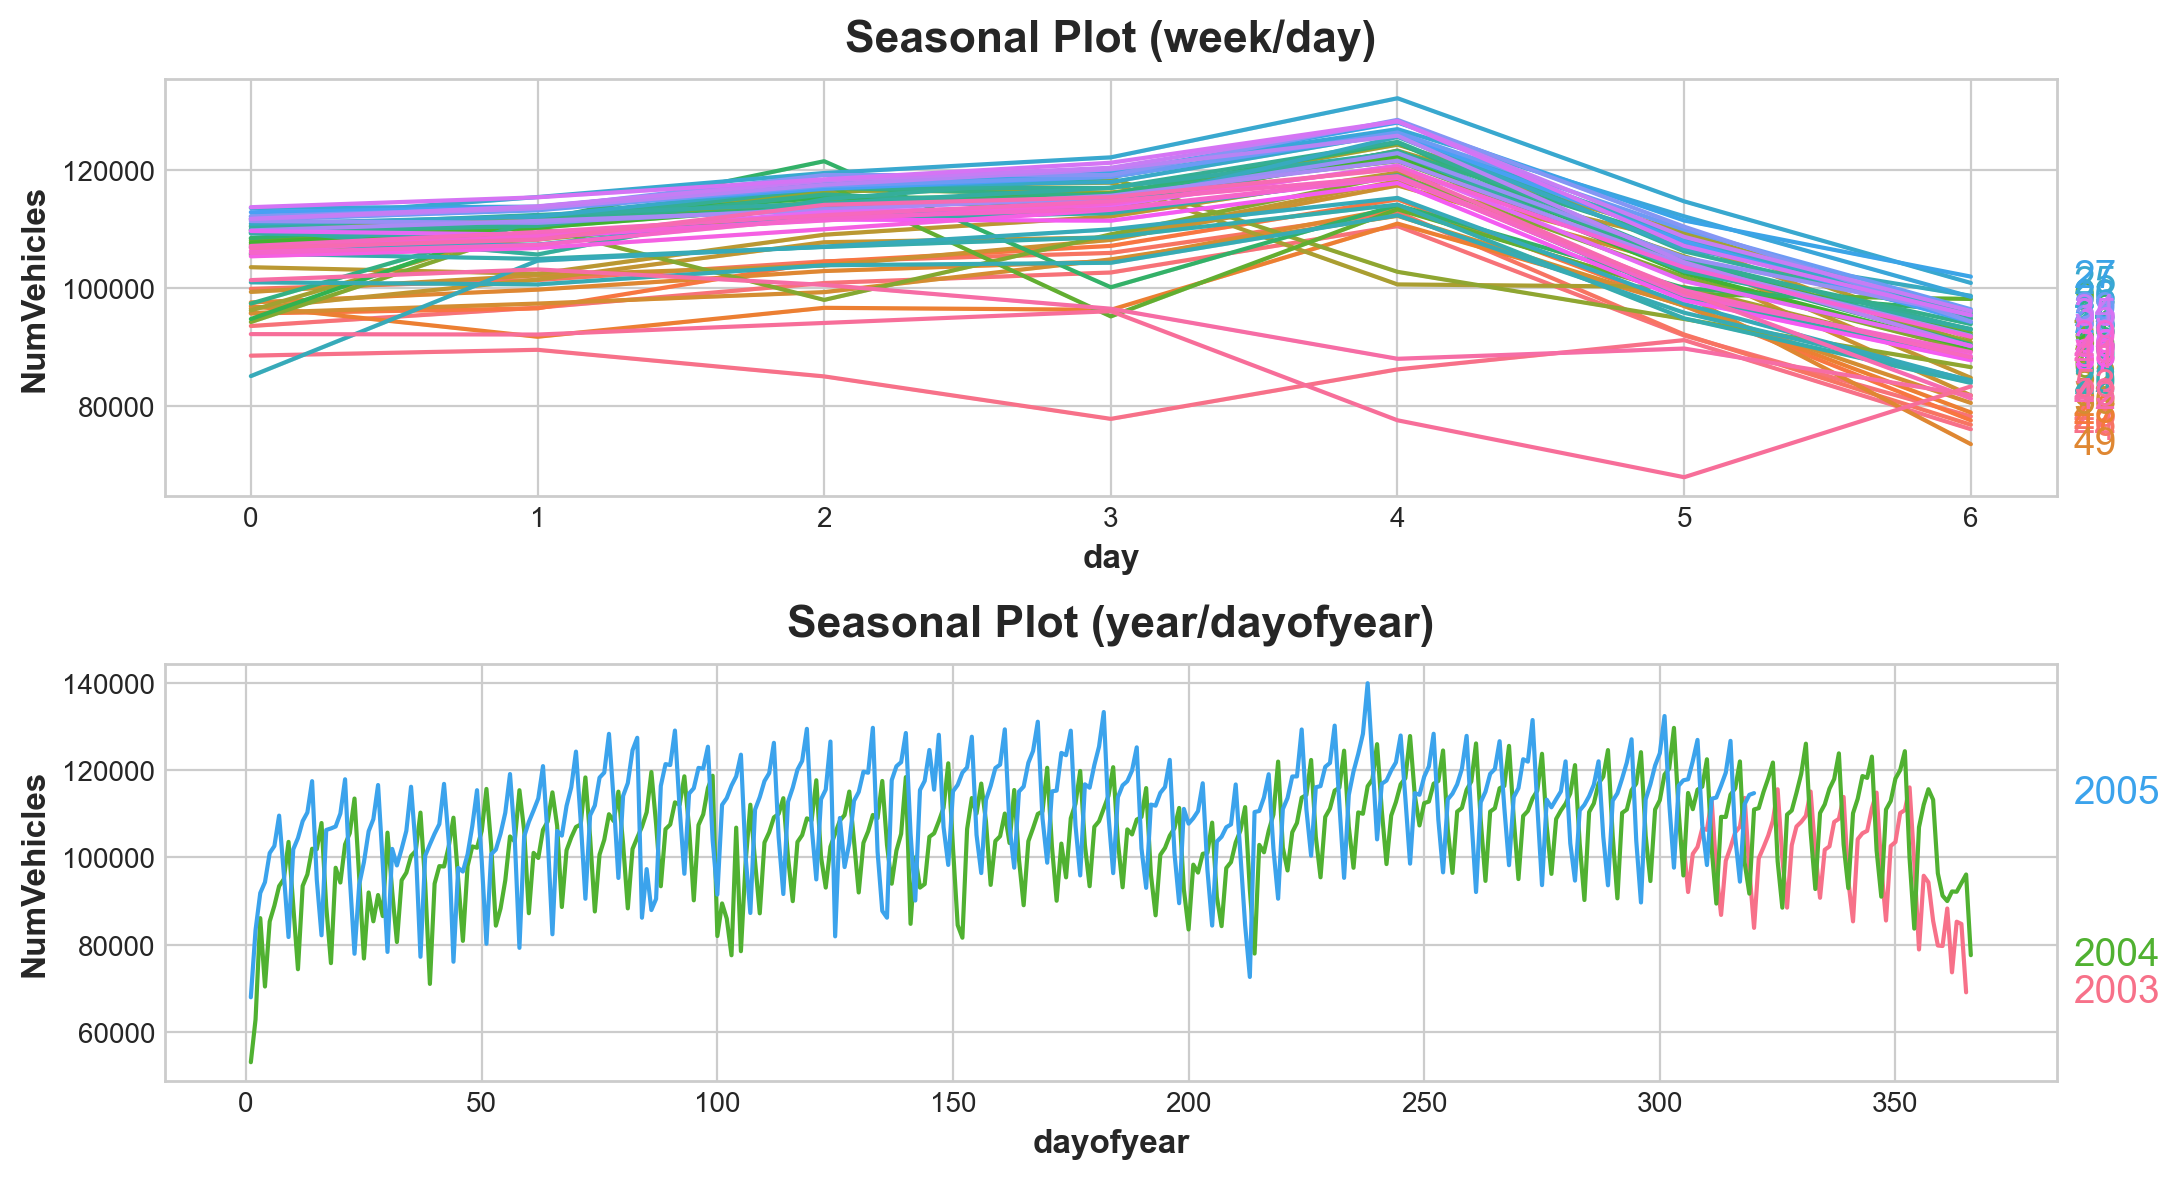

In [24]:
X = tunnel.copy()

# days within a week
X['day'] = X.index.dayofweek   # the x-axis (freq)
X['week'] = X.index.week   # the seasonal period (period)

# days within a year
X['dayofyear'] = X.index.dayofyear
X['year'] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (11, 6))
seasonal_plot(X, y = 'NumVehicles', period = 'week', freq = 'day', ax = ax0)
seasonal_plot(X, y = 'NumVehicles', period = 'year', freq = 'dayofyear', ax = ax1);

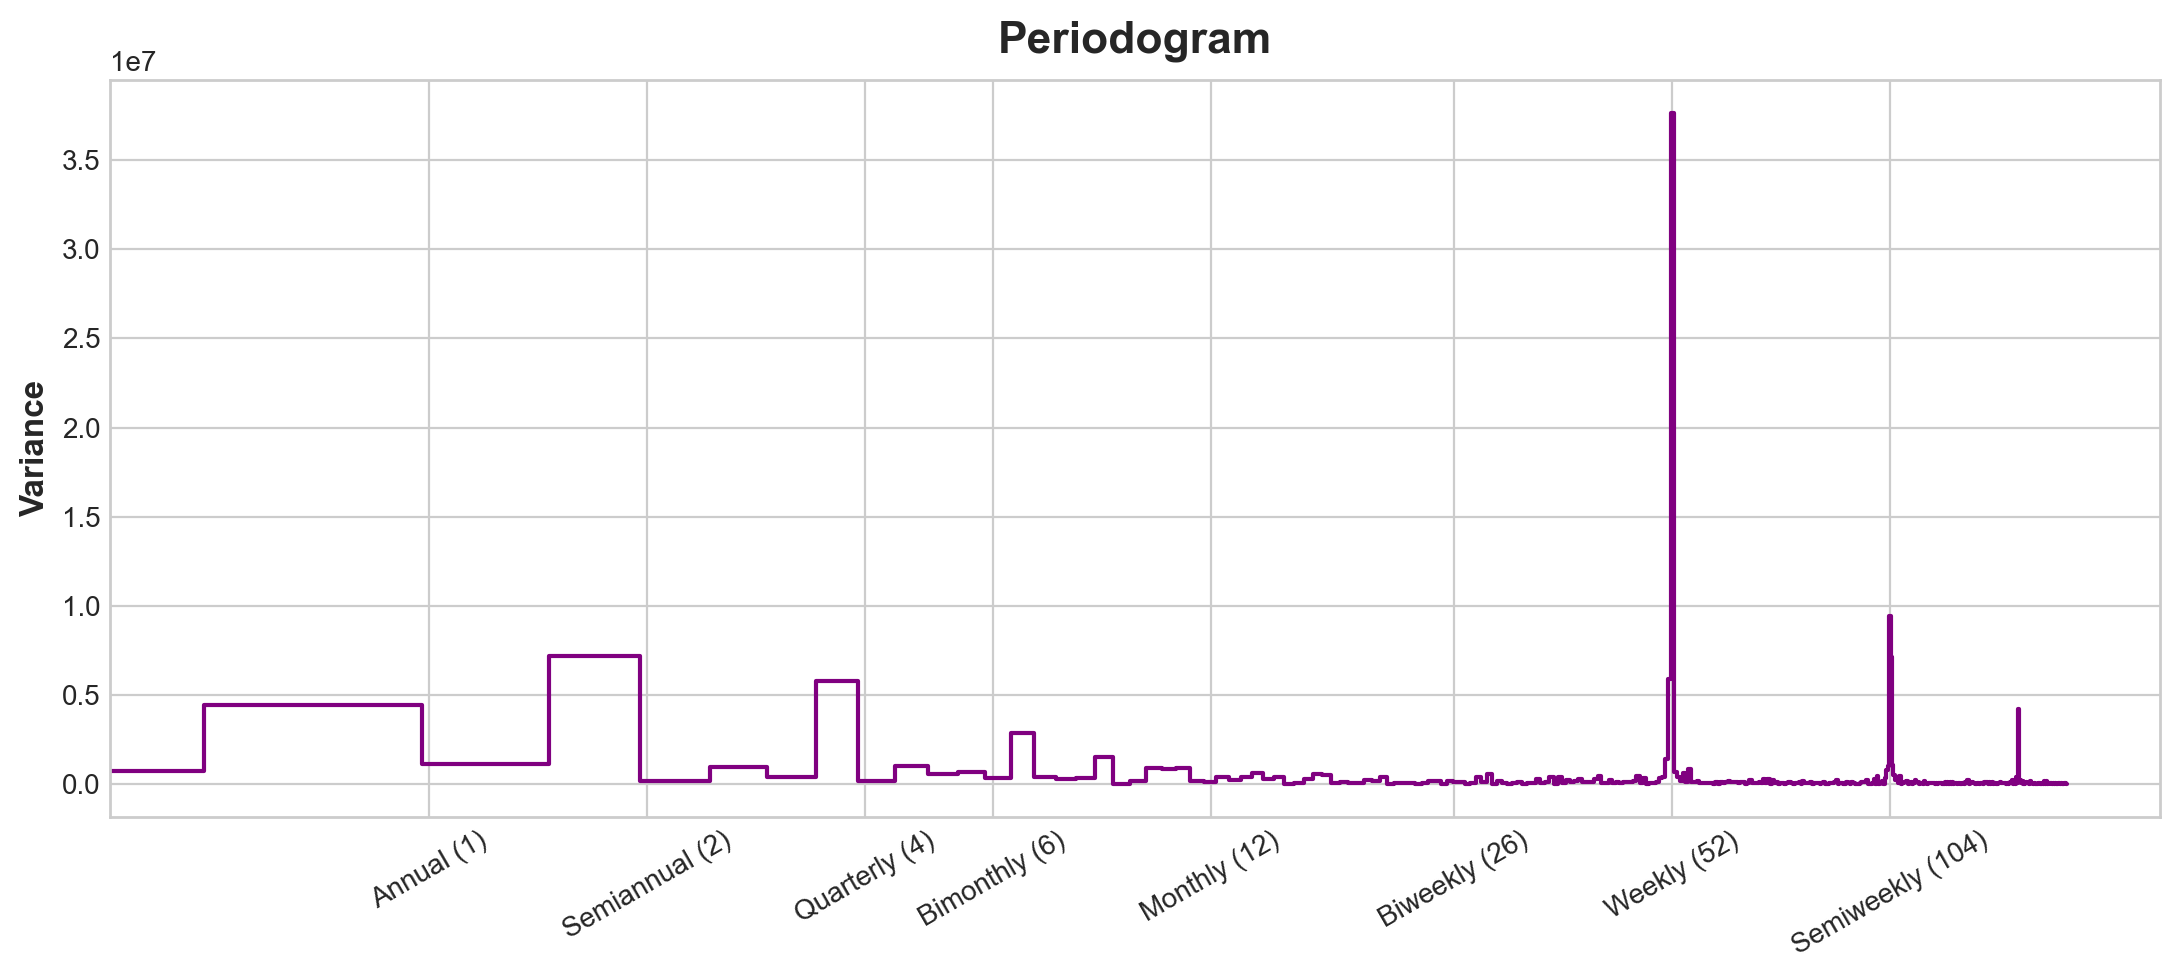

In [27]:
plot_periodogram(tunnel.NumVehicles);

In [28]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq = 'A', order = 10)   # 10 sin/cos pairs for 'A'nnual seasonality

dp = DeterministicProcess(
    index = tunnel.index,
    constant = True,                # dummy feature for bias (y-intercept)
    order = 1,                      # trend (order 1 means linear)
    seasonal = True,                # weekly seasonality (indicators)
    additional_terms = [fourier],   # annual seasonality (fourier)
    drop = True,                    # drop terms to avoid collinearity
)

X = dp.in_sample()   # create features for dates in tunnel.index

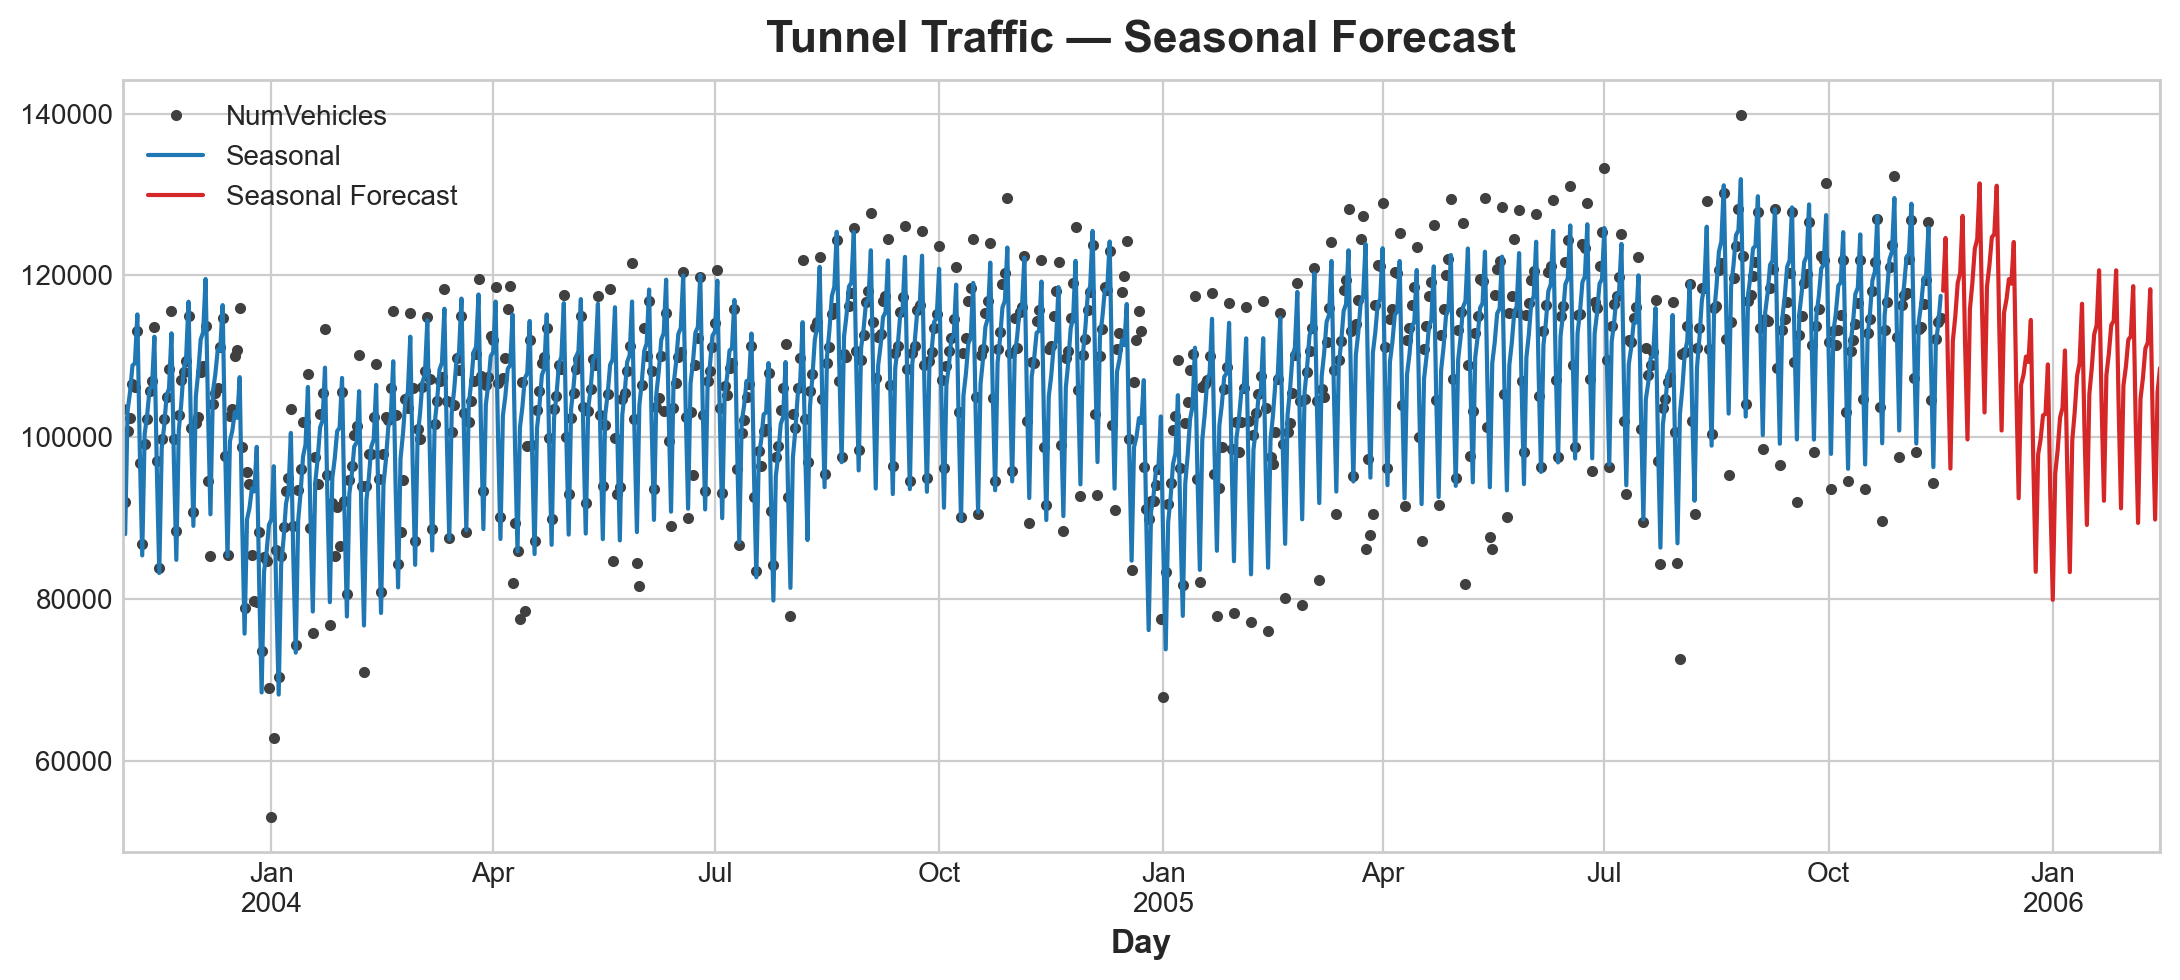

In [29]:
y = tunnel['NumVehicles']

model = LinearRegression(fit_intercept = False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = y.index)
X_fore = dp.out_of_sample(steps = 90)
y_fore = pd.Series(model.predict(X_fore), index = X_fore.index)

ax = y.plot(color = '0.25', style = '.', title = 'Tunnel Traffic — Seasonal Forecast')
ax = y_pred.plot(ax = ax, label = 'Seasonal')
ax = y_fore.plot(ax = ax, label = 'Seasonal Forecast', color = 'C3')
_ = ax.legend()

## 4. Time Series as Features

In [2]:
reserve = pd.read_csv(
    'input/reserve.csv',
    parse_dates = {'Date': ['Year', 'Month', 'Day']},
    index_col = 'Date',
)

y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')

df = pd.DataFrame({
    'y': y,
    'y_lag_1': y.shift(1),
    'y_lag_2': y.shift(2),
})

df.head()

,y,y_lag_1,y_lag_2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1


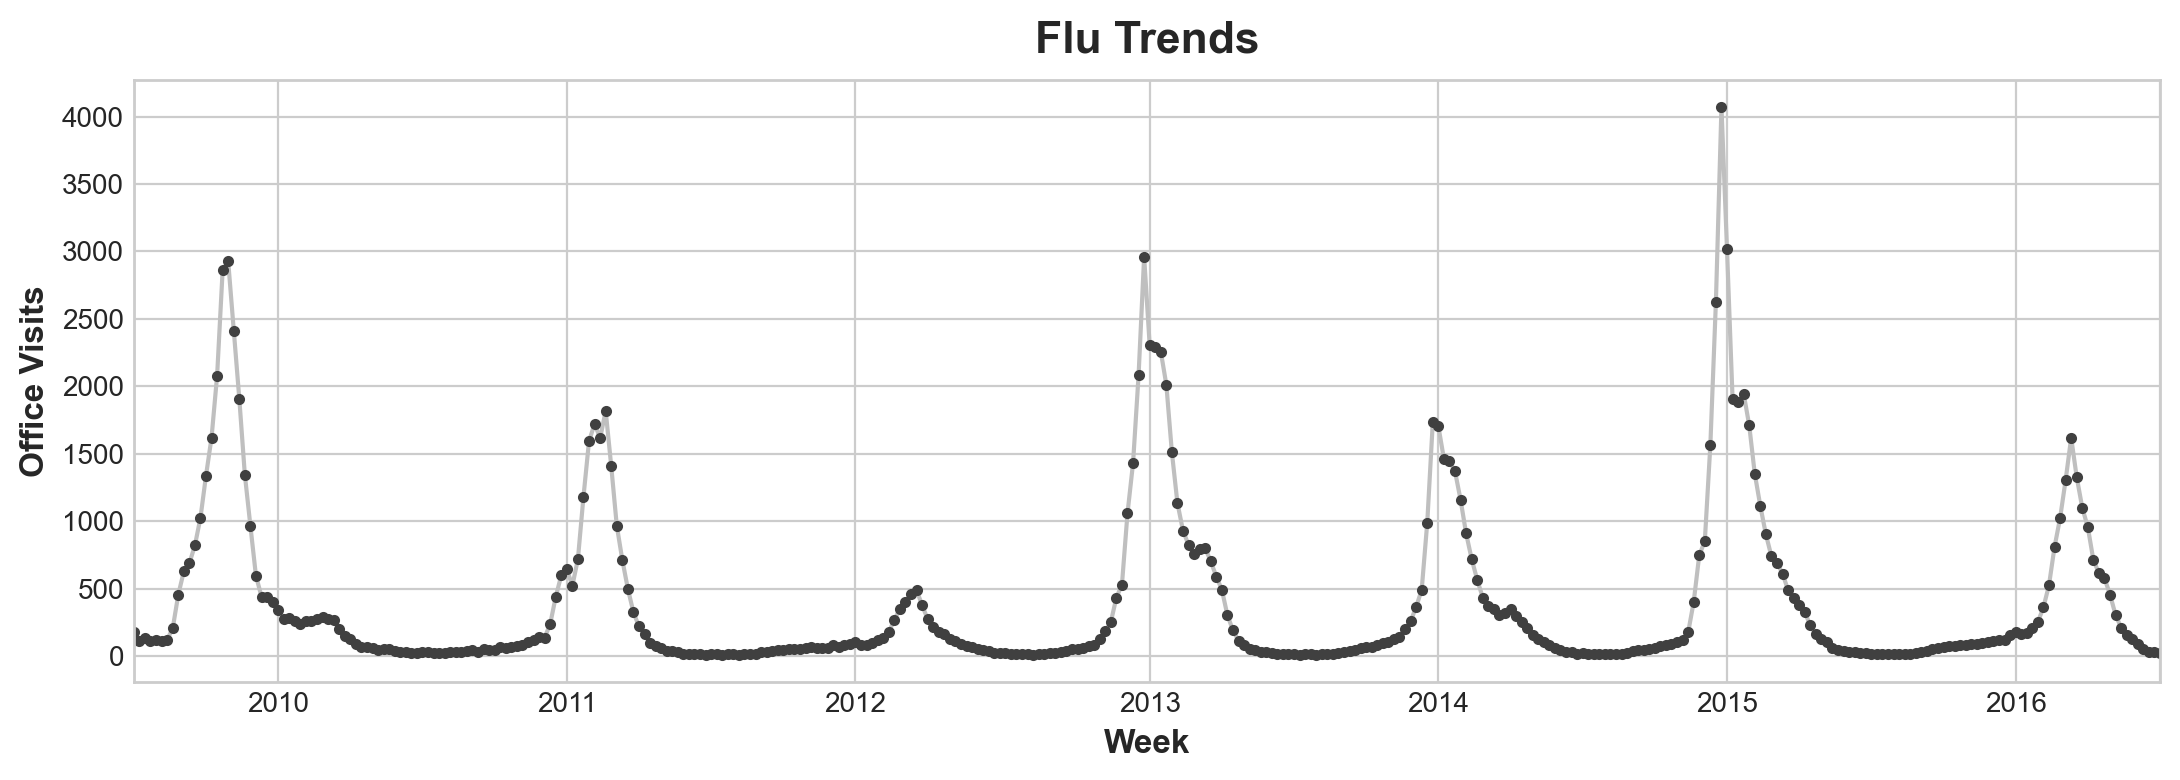

In [3]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


data_dir = Path("input/flu-trends.csv")
flu_trends = pd.read_csv(data_dir)
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

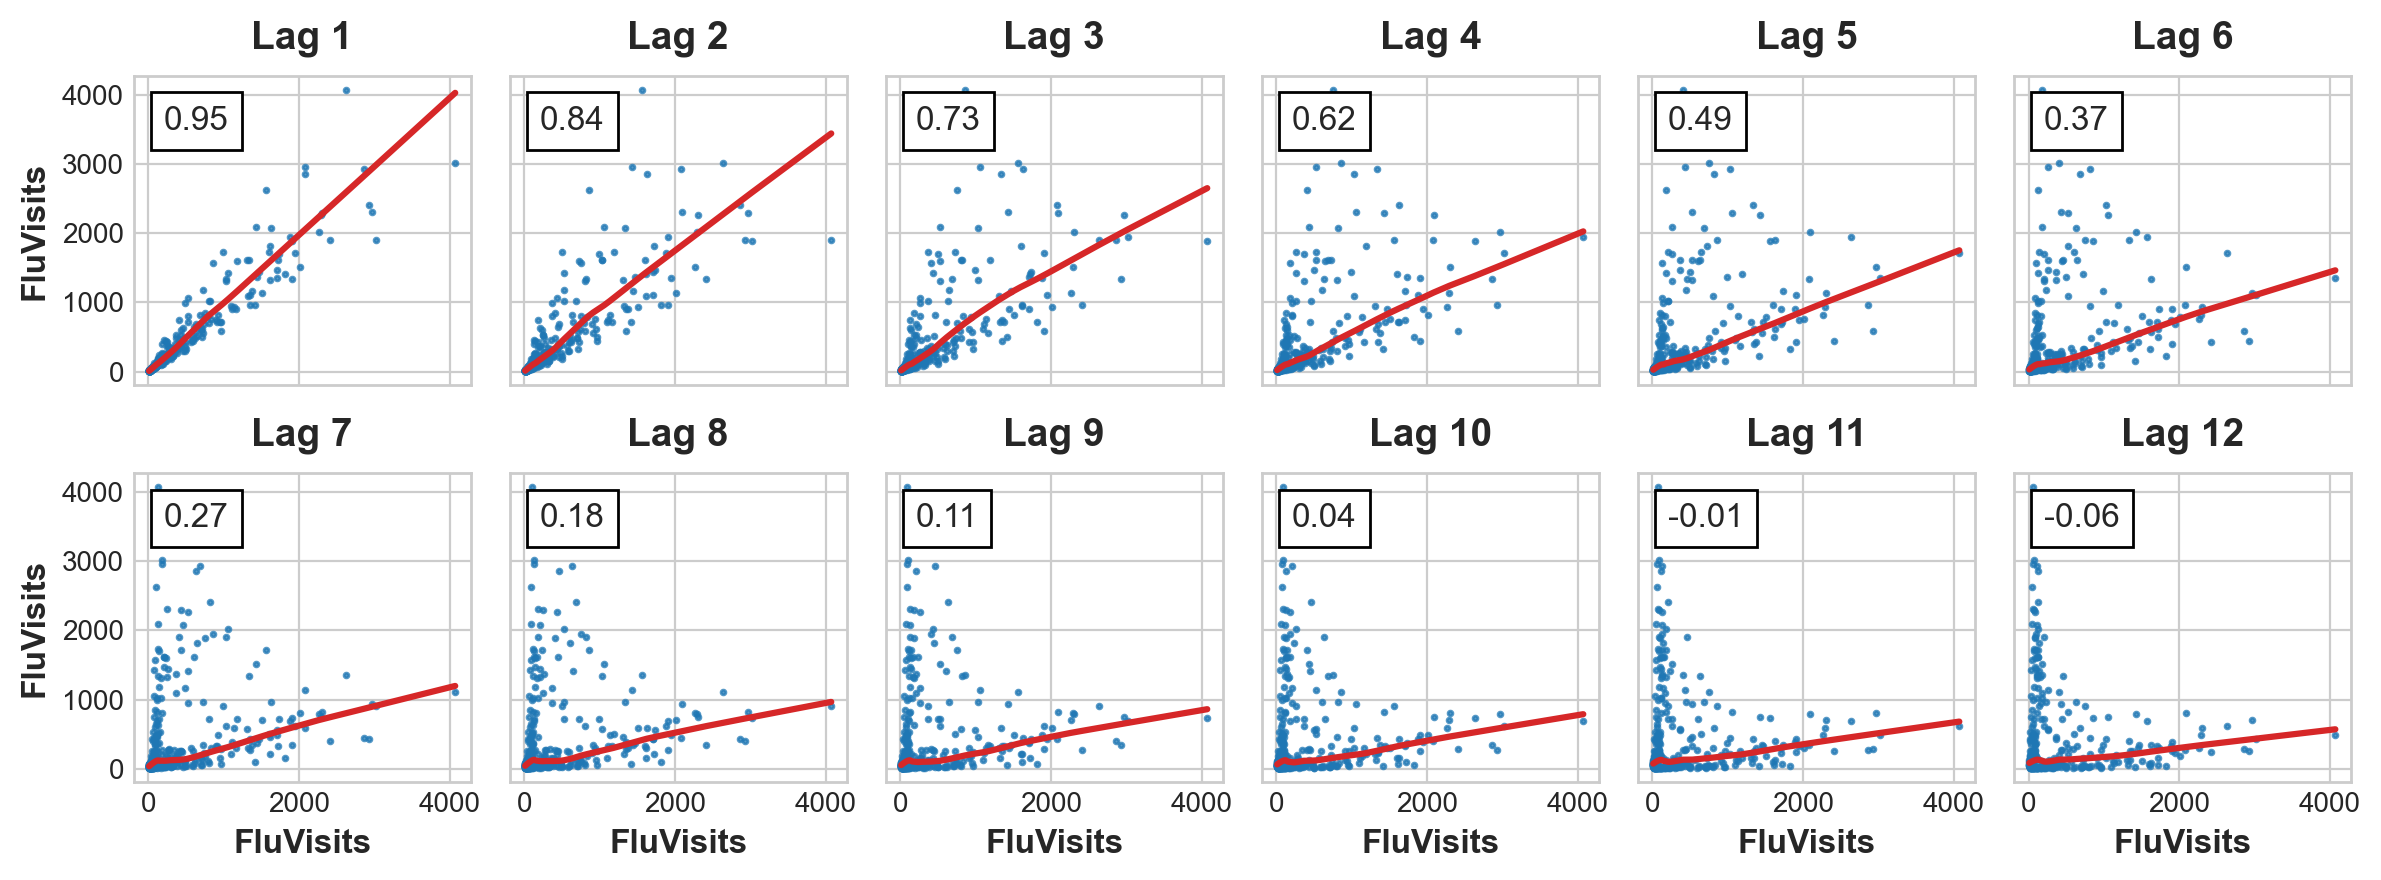

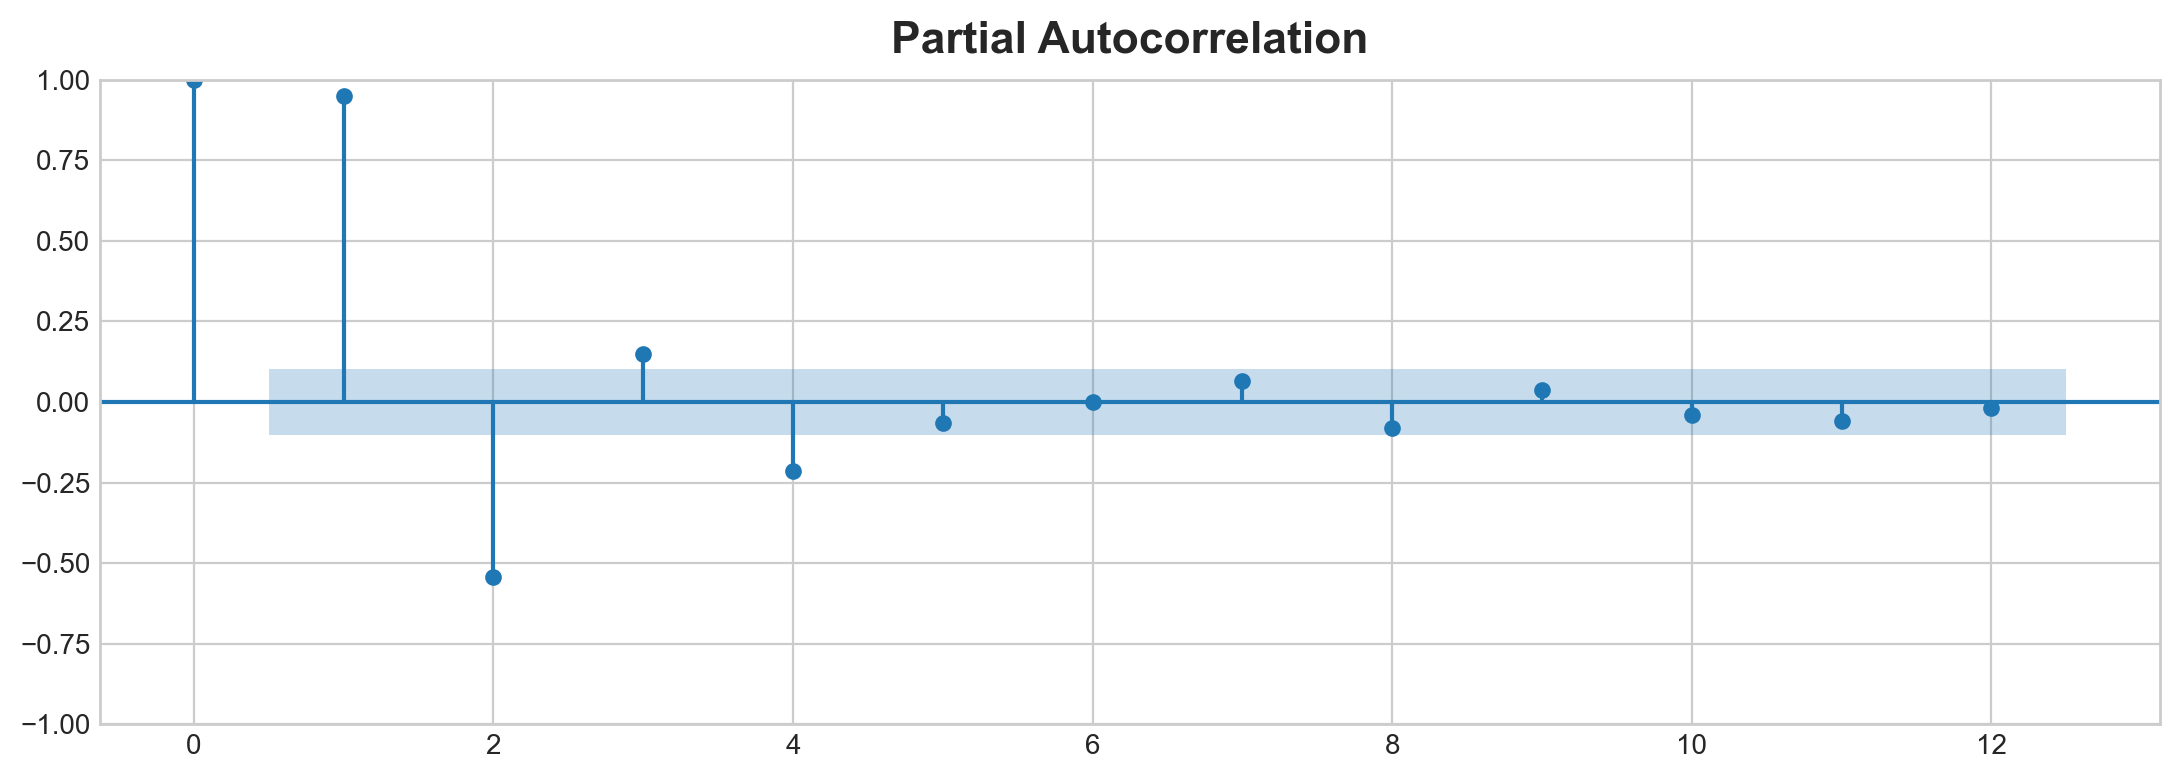

In [4]:
_ = plot_lags(flu_trends.FluVisits, lags = 12, nrows = 2)
_ = plot_pacf(flu_trends.FluVisits, lags = 12)

In [6]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis = 1)

X = make_lags(flu_trends.FluVisits, lags = 4)
X = X.fillna(0.0)

In [7]:
# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 60, shuffle = False)

# Fit and predict
model = LinearRegression()   # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

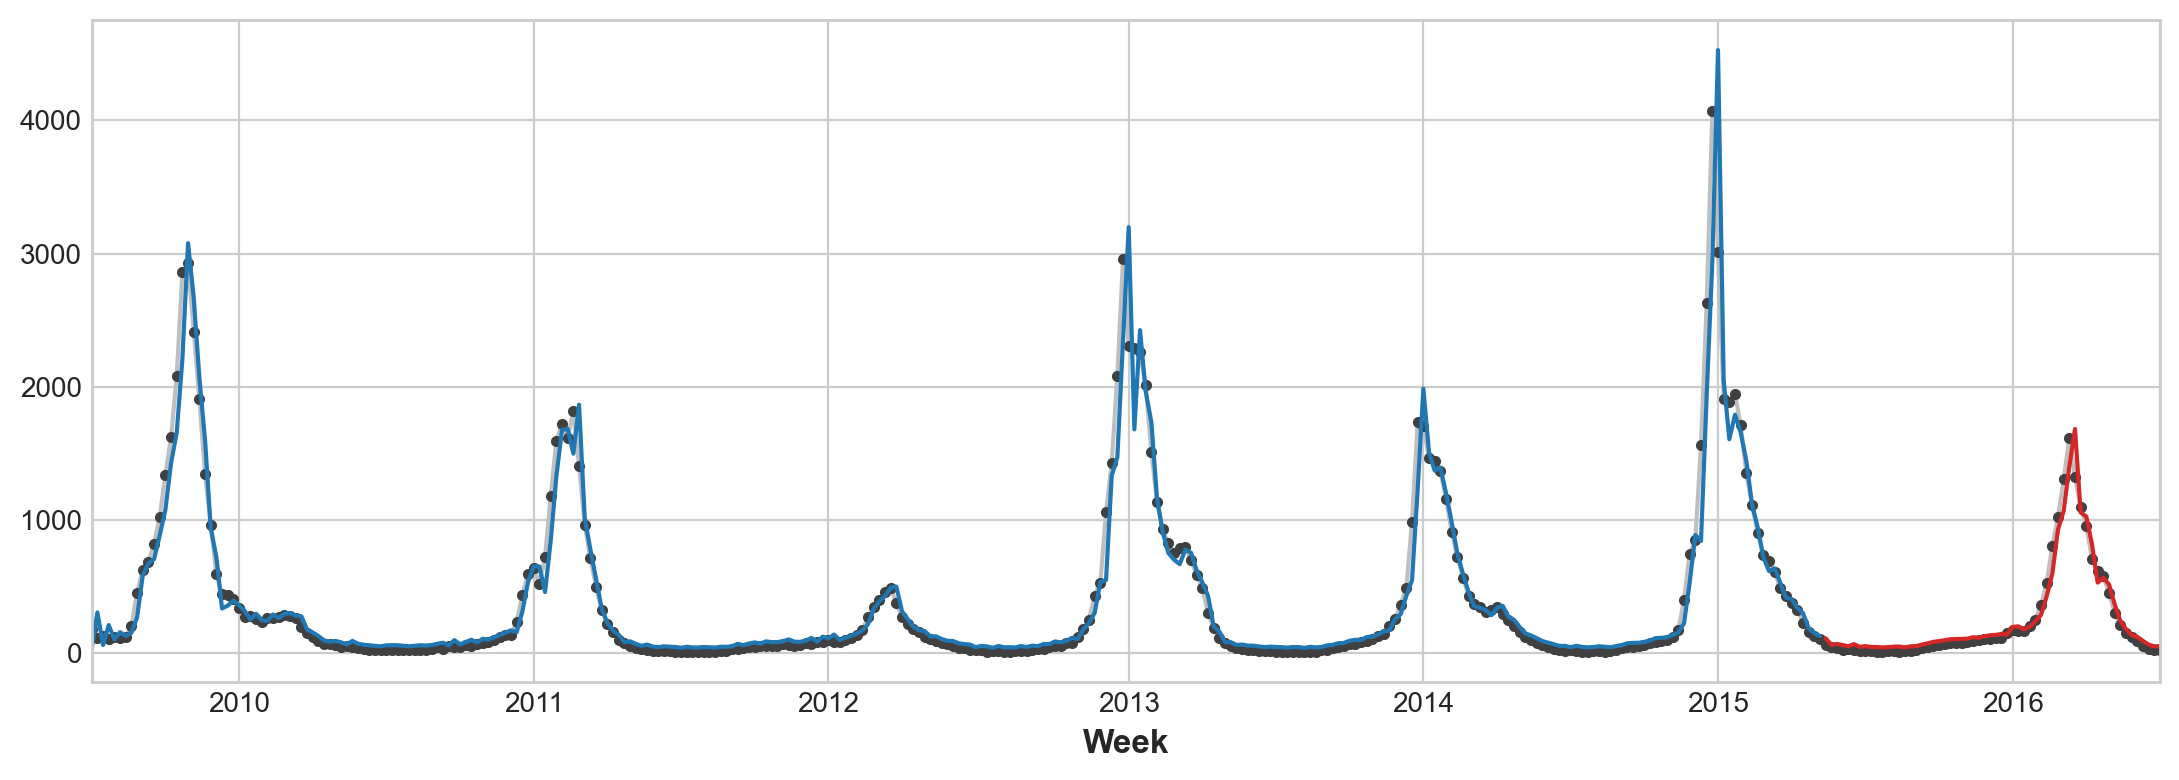

In [8]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax = ax)
_ = y_fore.plot(ax = ax, color = 'C3')

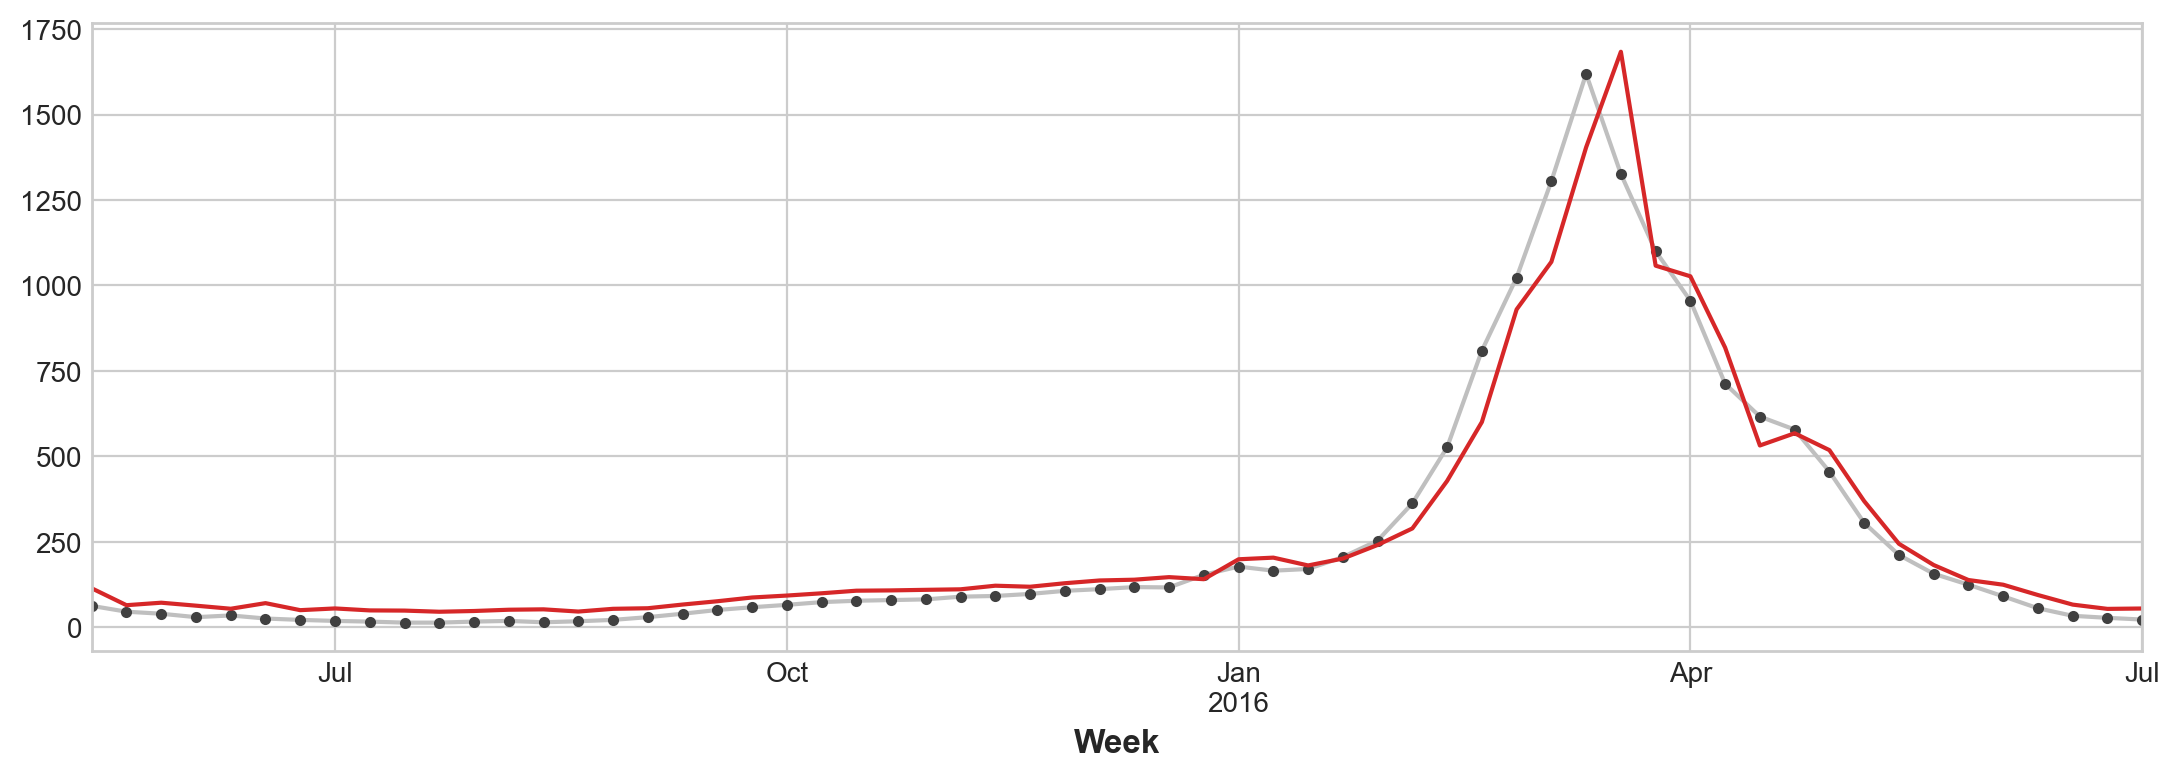

In [9]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax = ax, color = 'C3')

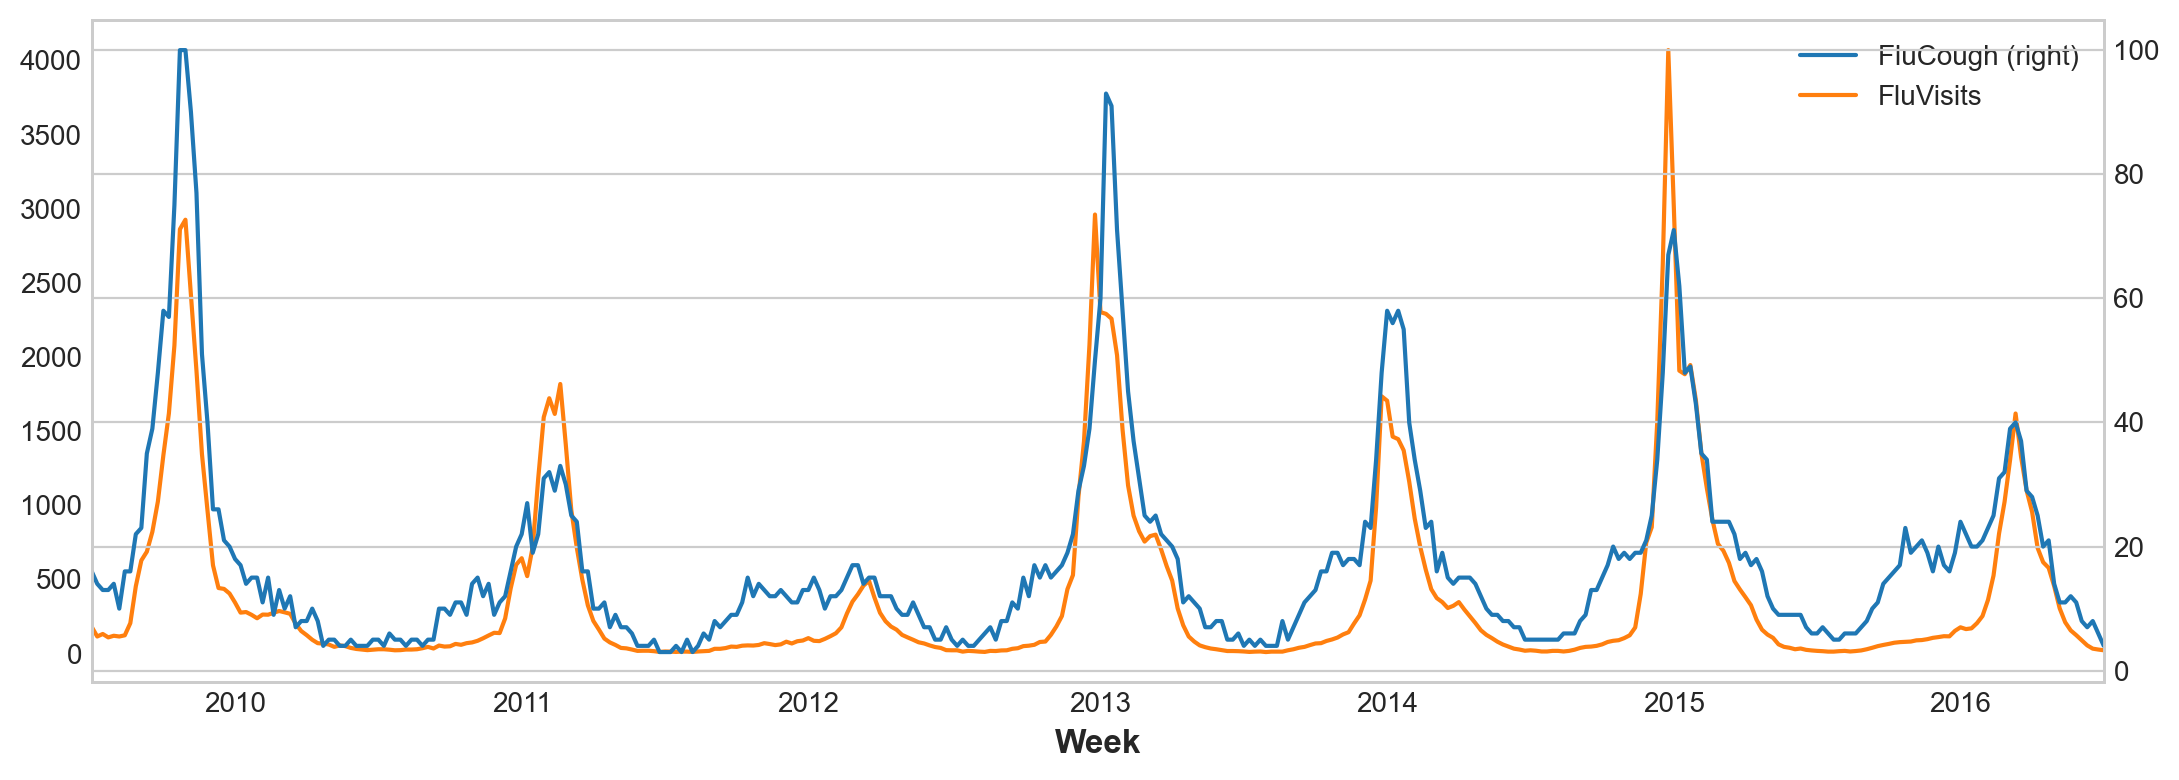

In [10]:
ax = flu_trends.plot(
    y = ['FluCough', 'FluVisits'],
    secondary_y = 'FluCough'
)

In [11]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu",
                "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags = 3)
X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags = 4)

# Combine to create the training data
X = pd.concat([X0, X1], axis = 1).fillna(0.0)

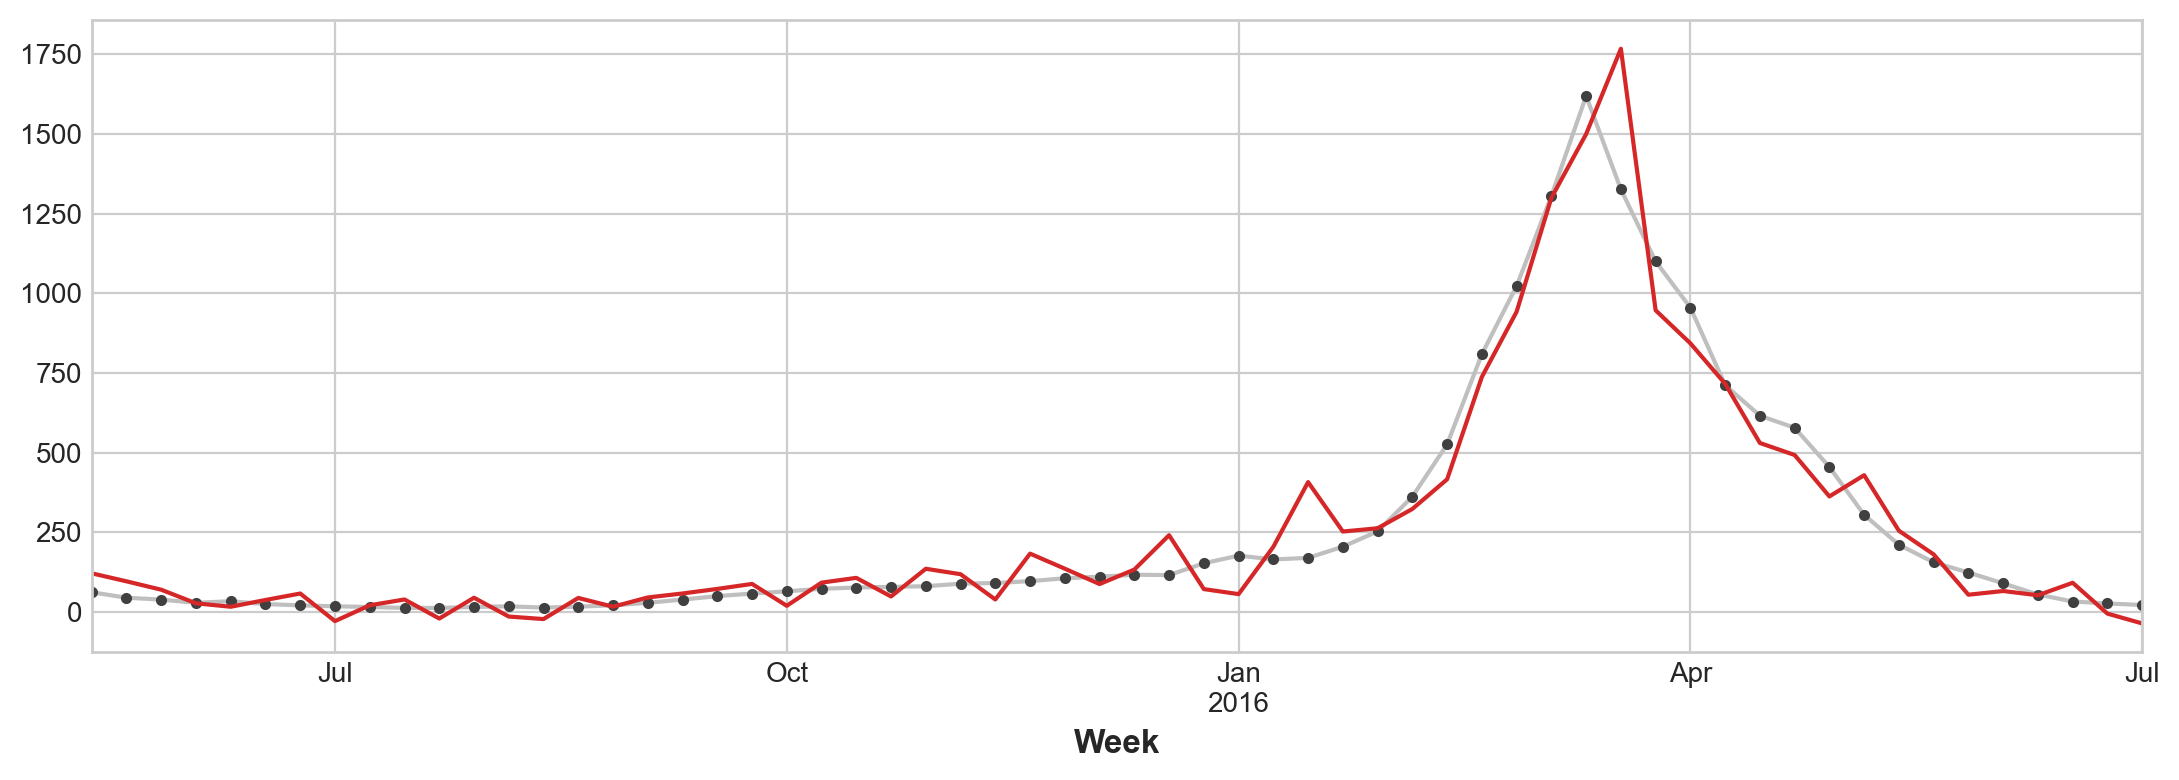

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 60, shuffle = False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax = ax, color = 'C3')

## 5. Hybrid Models